# Diseño Completamente al Azar (DCA)

## Resumen General

El **Diseño Completamente al Azar (DCA)** se emplea cuando las unidades experimentales son homogéneas y pueden ser asignadas aleatoriamente a tratamientos sin necesidad de bloques. Se aplica frecuentemente en condiciones controladas, como laboratorios.

## Modelo Estadístico

El modelo estadístico para el DCA es:

$$
Y_{ij} = \mu + \tau_i + \epsilon_{ij}
$$

- $Y_{ij}$: Respuesta observada para el tratamiento $i$ en la repetición $j$
- $\mu$: Media general
- $\tau_i$: Efecto del tratamiento $i$
- $\epsilon_{ij}$: Error aleatorio, con $E(\epsilon_{ij}) = 0$, $Var(\epsilon_{ij}) = \sigma^2$

## Hipótesis

- **$H_0$**: $\tau_1 = \tau_2 = \dots = \tau_t$ (todos los tratamientos tienen el mismo efecto)
- **$H_a$**: Al menos uno de los $\tau_i$ es distinto

## Supuestos del Modelo

| **SUPUESTO**                  | **PRUEBA**                          | **REGLA DE DECISIÓN**                                      |
|------------------------------|-------------------------------------|-------------------------------------------------------------|
| Normalidad de residuos       | Shapiro-Wilk / Kolmogorov-Smirnov  | $p > \alpha \Rightarrow$ residuos normales                 |
| Homogeneidad de varianzas    | Levene                              | $p > \alpha \Rightarrow$ varianzas homogéneas              |
| Independencia de residuos    | Durbin-Watson                       | Estadístico $DW \approx 2 \Rightarrow$ residuos independientes |

## ANOVA

\[
\begin{array}{|c|c|c|c|c|}
\hline
\textbf{Fuente} & \textbf{GL} & \textbf{Suma de Cuadrados (SC)} & \textbf{Cuadrado Medio (CM)} & \textbf{F} \\
\hline
\text{Tratamientos} & t - 1 & SC_{\text{trat}} = \sum_{i=1}^t \frac{Y_{i.}^2}{r_i} - \frac{Y_{..}^2}{N} & CM_{\text{trat}} = \frac{SC_{\text{trat}}}{t - 1} & F = \frac{CM_{\text{trat}}}{CM_{\text{error}}} \\
\hline
\text{Error} & \sum r_i - t & SC_{\text{error}} = SC_{\text{total}} - SC_{\text{trat}} & CM_{\text{error}} = \frac{SC_{\text{error}}}{GL_{\text{error}}} & \\
\hline
\text{Total} & N - 1 & SC_{\text{total}} = \sum_{i=1}^t \sum_{j=1}^{r_i} Y_{ij}^2 - \frac{Y_{..}^2}{N} & & \\
\hline
\end{array}
\]

Donde:

- $t$: número de tratamientos
- $r_i$: número de repeticiones por tratamiento $i$
- $Y_{i.}$: suma total del tratamiento $i$
- $Y_{..}$: suma total de todos los tratamientos
- $N$: total de observaciones

## Regla de Decisión

- Si $F_{\text{calc}} > F_{\text{tab}}$, entonces **rechazar** $H_0$
- Equivalente: Si $p$-valor $< \alpha$, entonces **rechazar** $H_0$

## Pruebas Post-hoc (Comparaciones Múltiples)

### 1. LSD de Fisher (Diseño balanceado)

$$
LSD = t_{\alpha/2, \, GL_{\text{error}}} \cdot \sqrt{MSE \left( \frac{1}{n_i} + \frac{1}{n_j} \right)}
$$

### 2. Tukey

$$
HSD = q_{\alpha}(k, \, GL_{\text{error}}) \cdot \sqrt{\frac{MSE}{n}}
$$

### 3. Scheffé

$$
S = \sqrt{(k - 1) \cdot F_{\alpha}(k - 1, GL_{\text{error}}) \cdot \frac{MSE}{n}}
$$


CODIGO EN PYTHON 

ANALISIS DEL EXPERIMENTO

In [18]:
# Ingresar los datos del experimento
factor = "marca de las baterías"
niveles = ["Marca_1","Marca_2","Marca_3"]
tratamientos_inp = ["T_1","T_2","T_3"]
unidad_experimental = "Batería"
variable_respuesta = "Vida de la batería (semanas)" 

# Mostrar resumen
print("\nResumen del Experimento:")
print(f"Factor: {factor}")
print(f"Niveles del factor: {niveles}")
print(f"Tratamientos: {tratamientos_inp}")
print(f"Unidad experimental: {unidad_experimental}")
print(f"Variable de respuesta: {variable_respuesta}")


# Almacenar en un diccionario para usarlo después
experimento = {
    "factor": factor,
    "niveles": niveles,
    "tratamientos": tratamientos_inp,
    "unidad_experimental": unidad_experimental,
    "variable_respuesta": variable_respuesta
}



Resumen del Experimento:
Factor: marca de las baterías
Niveles del factor: ['Marca_1', 'Marca_2', 'Marca_3']
Tratamientos: ['T_1', 'T_2', 'T_3']
Unidad experimental: Batería
Variable de respuesta: Vida de la batería (semanas)


Paso 1 : Importar librerías

In [19]:

# Librerias
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import shapiro
from scipy.stats import levene
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
from statsmodels.graphics.regressionplots import influence_plot
import seaborn as sns
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.api import anova_lm
from scipy.stats import f


Paso 2 : Insertar lo datos con los que se va a trabajar

In [20]:
#crear DataFrame
# Datos del ejemplo (tratamiento vs resistencia)
df = pd.DataFrame({
    'Tratamiento': ['T1']*6 + ['T2']*4 + ['T3']*5 + ['T4']*4 ,
    'Resistencia': [80,75,65,78,60,76,45,45,50,55,100,110,120,115,120,170,160,165,150]
})
print(df)


   Tratamiento  Resistencia
0           T1           80
1           T1           75
2           T1           65
3           T1           78
4           T1           60
5           T1           76
6           T2           45
7           T2           45
8           T2           50
9           T2           55
10          T3          100
11          T3          110
12          T3          120
13          T3          115
14          T3          120
15          T4          170
16          T4          160
17          T4          165
18          T4          150


Paso 3 :  Primer vistazo de la tabla ANOVA

In [21]:
modelo = ols('Resistencia ~ C(Tratamiento)', data=df).fit()
anova_table = sm.stats.anova_lm(modelo, typ=2)
print(anova_table)

                      sum_sq    df           F        PR(>F)
C(Tratamiento)  30754.324561   3.0  173.785974  7.163572e-12
Residual          884.833333  15.0         NaN           NaN


Paso 4 : Extraccion de resiudos 


Primeros residuos:
[[  7.66666667]
 [  2.66666667]
 [ -7.33333333]
 [  5.66666667]
 [-12.33333333]
 [  3.66666667]
 [ -3.75      ]
 [ -3.75      ]
 [  1.25      ]
 [  6.25      ]
 [-13.        ]
 [ -3.        ]
 [  7.        ]
 [  2.        ]
 [  7.        ]
 [  8.75      ]
 [ -1.25      ]
 [  3.75      ]
 [-11.25      ]]


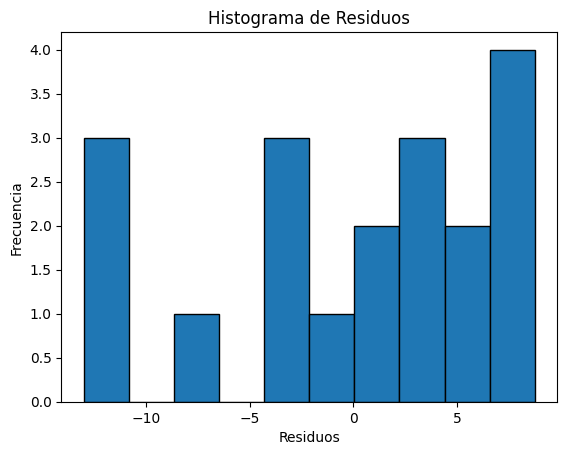

In [22]:
# Extracción de los residuales
residuos = modelo.resid
print("\nPrimeros residuos:")
print(residuos.values.reshape(-1, 1))

# Histograma de los residuos
plt.hist(residuos, bins=10, edgecolor='black')
plt.title('Histograma de Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()


Paso 5 : Graficos de diagnostico

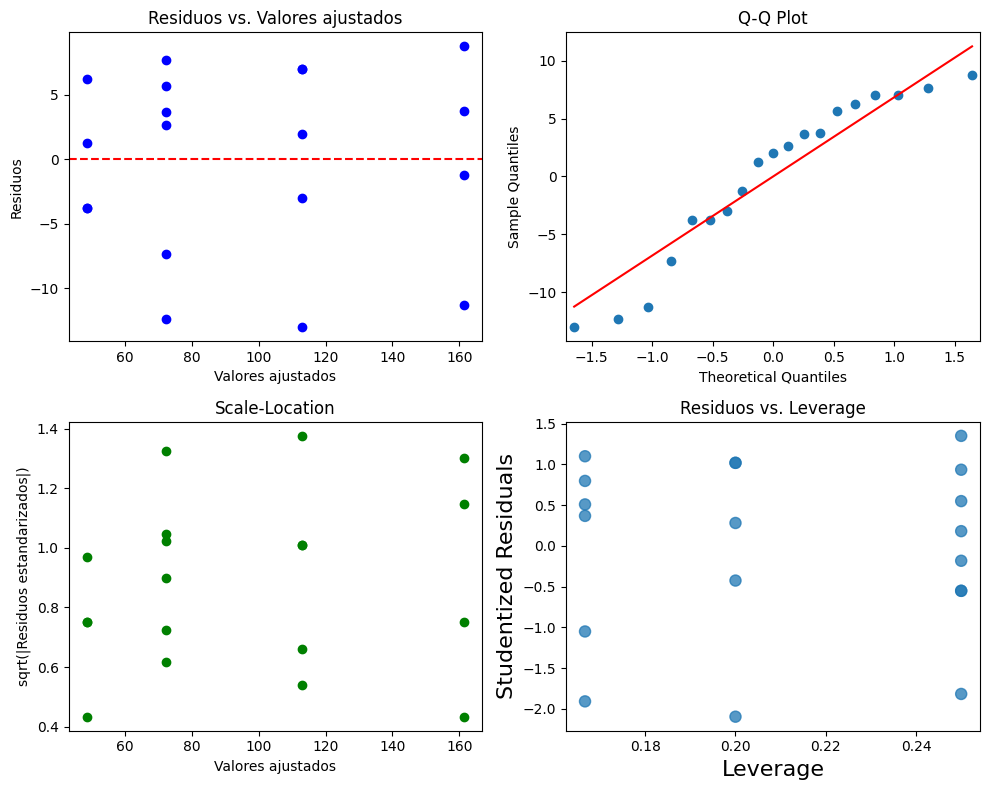

In [23]:
# 4. Gráficos diagnósticos (similar a plot(modelo2) en R)
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
# a) Residuos vs. Valores ajustados
axes[0, 0].scatter(modelo.fittedvalues, residuos, color='blue')
axes[0, 0].axhline(0, color='red', linestyle="--")
axes[0, 0].set_xlabel("Valores ajustados")
axes[0, 0].set_ylabel("Residuos")
axes[0, 0].set_title("Residuos vs. Valores ajustados")
# b) Q-Q Plot para evaluar normalidad
sm.qqplot(residuos, line='s', ax=axes[0, 1])
axes[0, 1].set_title("Q-Q Plot")
# c) Gráfico Scale-Location: raíz del valor absoluto de los residuos estandarizados vs. valores ajustados
influence = modelo.get_influence()
std_resid = influence.resid_studentized_internal
sqrt_abs_std_resid = np.sqrt(np.abs(std_resid))
axes[1, 0].scatter(modelo.fittedvalues, sqrt_abs_std_resid, color='green')
axes[1, 0].set_xlabel("Valores ajustados")
axes[1, 0].set_ylabel("sqrt(|Residuos estandarizados|)")
axes[1, 0].set_title("Scale-Location")
# d) Residuos vs. Leverage (para detectar puntos influyentes)
# d) Residuos vs. Leverage (para detectar puntos influyentes)
influence_plot(modelo, ax=axes[1, 1], size=8)
axes[1, 1].set_title("Residuos vs. Leverage")


plt.tight_layout()
plt.show()


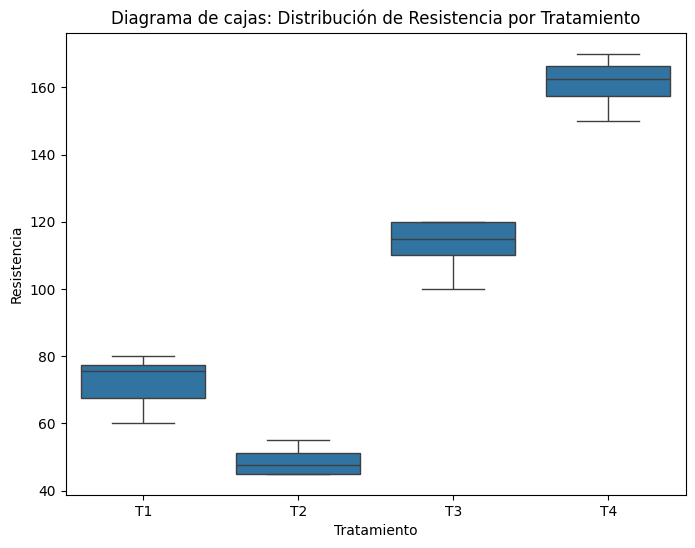

In [24]:
# Diagrama de cajas para visualizar la distribución de la Resistencia según el Tratamiento
plt.figure(figsize=(8, 6))
sns.boxplot(x='Tratamiento', y='Resistencia', data=df)
plt.title("Diagrama de cajas: Distribución de Resistencia por Tratamiento")
plt.xlabel("Tratamiento")
plt.ylabel("Resistencia")
plt.show()

\footnotesize

##  Interpretación de los Gráficos Diagnósticos del ANOVA

- **Residuos vs. Valores Ajustados**:  
  Evalúa la linealidad y homocedasticidad. Una distribución aleatoria de puntos alrededor de la línea horizontal ($y = 0$) indica que los errores son independientes y tienen varianza constante. La presencia de patrones sugiere no linealidad o heterocedasticidad.

- **Q-Q Plot (Quantile-Quantile Plot)**:  
  Compara la distribución de los residuos con una normal teórica. Si los puntos se alinean sobre la línea diagonal, se asume normalidad. Desviaciones sistemáticas indican que los residuos no son normales.

- **Scale-Location (raíz de residuos estandarizados vs. valores ajustados)**:  
  Evalúa si la varianza de los residuos es constante. Una dispersión horizontal homogénea indica homocedasticidad. Un patrón de embudo sugiere heterocedasticidad.

- **Residuos vs. Leverage (gráfico de influencia)**:  
  Identifica observaciones influyentes. Puntos con alto leverage y grandes residuos pueden afectar el modelo significativamente. Las líneas de distancia de Cook ayudan a detectar observaciones problemáticas.

- **Histograma de residuos**:  
  Permite observar la forma de la distribución de los errores. Si los residuos siguen una distribución normal, el histograma debe mostrar una forma de campana (curva gaussiana). Asimetrías o picos inusuales pueden indicar violación del supuesto de normalidad.

- **Boxplot general de residuos**:  
  Permite identificar valores atípicos (outliers) entre los residuos. Si los residuos están centrados en cero y dentro del rango intercuartílico sin demasiados puntos extremos, se refuerza la validez de los supuestos. Presencia de outliers podría indicar observaciones anómalas que afectan el modelo.


Paso 6: Verificar los supuestos del modelo

6.1 Prueba de normalidad: Shapiro-Wilk sobre los residuales

In [25]:
# Normalidad de los residuos
shapiro_result = shapiro(residuos)
print("\nResultado de la prueba de Shapiro-Wilk:")
print(f"W = {shapiro_result.statistic:.4f}, p-value = {shapiro_result.pvalue:.4f}")
# --- Conclusión para Shapiro-Wilk:
if shapiro_result.pvalue > 0.05:
    print("\n[Conclusión Shapiro-Wilk]: Los residuales o errores se ajustan una distribución normal (p > 0.05).")
else:
    print("\n[Conclusión Shapiro-Wilk]: Los residuales o errores no se ajustan  una distribución normal (p < 0.05).")


Resultado de la prueba de Shapiro-Wilk:
W = 0.9086, p-value = 0.0699

[Conclusión Shapiro-Wilk]: Los residuales o errores se ajustan una distribución normal (p > 0.05).


6.2 Prueba de homogeneidad de varianzas (Levene)

In [26]:
#Homogeneidad de varianzas (Levene)
# Se separan los datos por grupo (tratamiento)
lista_grupos = [df.loc[df["Tratamiento"] == trat, "Resistencia"] 
                for trat in df["Tratamiento"].unique()]

levene_median = levene(*lista_grupos, center='median')
levene_mean   = levene(*lista_grupos, center='mean')
print("\nResultado de la prueba de Levene (centro = mediana):")
print(levene_median)
print("\nResultado de la prueba de Levene (centro = media):")
print(levene_mean)
## --- Conclusión para Levene:
if levene_mean.pvalue > 0.05 and levene_median.pvalue > 0.05:
    print("\n[Conclusión Levene]: Se acepta la homogeneidad de varianzas entre los grupos (p > 0.05).")
else:
    print("\n[Conclusión Levene]: No se cumple la homogeneidad de varianzas (p < 0.05).")



Resultado de la prueba de Levene (centro = mediana):
LeveneResult(statistic=np.float64(0.20267853150292894), pvalue=np.float64(0.8929202001510861))

Resultado de la prueba de Levene (centro = media):
LeveneResult(statistic=np.float64(0.5431472222790354), pvalue=np.float64(0.6601604369129943))

[Conclusión Levene]: Se acepta la homogeneidad de varianzas entre los grupos (p > 0.05).


6.3 Prueba de independencia: estadístico de Durbin-Watson

In [27]:
dw = durbin_watson(residuos)
print("\nEstadístico de Durbin-Watson:")
print(dw)
# --- Conclusión Durbin-Watson:
if 1.5 <= dw <= 2.5:
    print("\n[Conclusión Durbin-Watson]: No se detecta autocorrelación en los residuales (valor cercano a 2).")
    print("se tiene evidencia estadisica para afirmar que hay independicia entre los residuos a un nivel significancia del 5%.")
else:
    print("\n[Conclusión Durbin-Watson]: Posibles indicios de autocorrelación en los residuales.")


Estadístico de Durbin-Watson:
2.2067793683681782

[Conclusión Durbin-Watson]: No se detecta autocorrelación en los residuales (valor cercano a 2).
se tiene evidencia estadisica para afirmar que hay independicia entre los residuos a un nivel significancia del 5%.


Paso 7 : Confrimacion de la tabla ANOVA e interpretación

Dado se que cumplen los supuestos de un DCA entonces podemos aplicar ANOVA

In [28]:
# 8. Confirmación de la tabla ANOVA
print("\nTabla ANOVA (confirmación):")
print(anova_table)


Tabla ANOVA (confirmación):
                      sum_sq    df           F        PR(>F)
C(Tratamiento)  30754.324561   3.0  173.785974  7.163572e-12
Residual          884.833333  15.0         NaN           NaN


In [29]:
# Nivel de significación
alpha = 0.05

# p-valor de la tabla ANOVA (usando la primera fila y la columna 'PR(>F)')
p_valor = anova_table['PR(>F)'][0]  # Asumimos que la fila de interés es "C(Tratamiento)"

# Interpretar la tabla ANOVA
print("\n Interpretación de la Tabla ANOVA :")
print(f"p-valor obtenido: {p_valor:.5e}")
print(f"Nivel de significación (alpha): {alpha:.2f}")

# Explicación detallada
print("\nExplicación:")
print("La prueba ANOVA compara la variabilidad entre los tratamientos con la variabilidad dentro de los tratamientos.")
print("El valor p obtenido nos indica la probabilidad de observar un efecto tan grande como el observado si la hipótesis nula es cierta.")

if p_valor < alpha:
    print(f"\nConclusión: Como el p-valor ({p_valor:.5e}) es menor que el nivel de significación ({alpha:.2f}), se RECHAZA la hipótesis nula (H₀).")
    print("Esto sugiere que hay suficiente evidencia estadística para afirmar que al menos uno de los tratamientos \n tiene un efecto significativo sobre la variable de respuesta.")
    print("Es decir, el factor '{}' afecta significativamente la variable de respuesta '{}'.".format(
          experimento["factor"], experimento["variable_respuesta"]))
    print("\nEste resultado implica que las diferencias entre los tratamientos son estadísticamente significativas y no se deben al azar.")
    print("Por lo tanto, se recomienda proceder con comparaciones post-hoc para identificar qué tratamientos \n son significativamente diferentes entre sí.")

else:
    print(f"\nConclusión: Como el p-valor ({p_valor:.5e}) es mayor o igual que el nivel de significación ({alpha:.2f}), NO se rechaza la hipótesis nula (H₀).")
    print("Esto sugiere que no hay suficiente evidencia estadística para afirmar que el factor '{}' tiene un efecto significativo  \n sobre la variable de respuesta '{}'.".format(
          experimento["factor"], experimento["variable_respuesta"]))
    print("\nEste resultado implica que las diferencias observadas entre los tratamientos podrían ser debidas al azar, y no a un efecto real del factor.")
    print("En este caso, no se recomienda proceder con comparaciones post-hoc, ya que no se \n  encontró evidencia suficiente para justificar que los tratamientos difieren significativamente.")

# Resumen adicional de la interpretación
print("\nResumen:")
print(f"Si el p-valor es menor que {alpha:.2f}, se rechaza la hipótesis nula y concluimos que el factor tiene un efecto significativo.")
print("Si el p-valor es mayor o igual que {alpha:.2f}, no podemos rechazar la hipótesis nula, lo que indica que el factor no tiene un efecto significativo.")



 Interpretación de la Tabla ANOVA :
p-valor obtenido: 7.16357e-12
Nivel de significación (alpha): 0.05

Explicación:
La prueba ANOVA compara la variabilidad entre los tratamientos con la variabilidad dentro de los tratamientos.
El valor p obtenido nos indica la probabilidad de observar un efecto tan grande como el observado si la hipótesis nula es cierta.

Conclusión: Como el p-valor (7.16357e-12) es menor que el nivel de significación (0.05), se RECHAZA la hipótesis nula (H₀).
Esto sugiere que hay suficiente evidencia estadística para afirmar que al menos uno de los tratamientos 
 tiene un efecto significativo sobre la variable de respuesta.
Es decir, el factor 'marca de las baterías' afecta significativamente la variable de respuesta 'Vida de la batería (semanas)'.

Este resultado implica que las diferencias entre los tratamientos son estadísticamente significativas y no se deben al azar.
Por lo tanto, se recomienda proceder con comparaciones post-hoc para identificar qué tratamient

C:\Users\Cesar_2borgbt\AppData\Local\Temp\ipykernel_8032\1933677310.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_valor = anova_table['PR(>F)'][0]  # Asumimos que la fila de interés es "C(Tratamiento)"


Paso 8 : Comparaciones múltiples de medias

8.1 Prueba de Diferencia Mínima Significativa (LSD) de Fisher:

In [30]:
# Agrupar y convertir a diccionario
group_dict = df.groupby("Tratamiento")["Resistencia"].apply(list).to_dict()
from itertools import combinations
from scipy.stats import ttest_ind  # Importar ttest_ind para realizar la prueba t

# Nivel de significancia
alpha = 0.05

# Contadores para comparaciones significativas y no significativas
significativas = 0
no_significativas = 0

# Comparaciones
for (grupo1, valores1), (grupo2, valores2) in combinations(group_dict.items(), 2):
    t_stat, p_value = ttest_ind(valores1, valores2, equal_var=True)
    print(f"Comparación {grupo1} vs {grupo2}: t = {t_stat:.3f}, p = {p_value:.4f}")
    
    # Conclusión basada en el p-valor
    if p_value < alpha:
        print(f"  RECHAZAMOS H₀: Diferencia significativa entre '{grupo1}' y '{grupo2}'.")
        significativas += 1
    else:
        print(f"  NO RECHAZAMOS H₀: No hay diferencia significativa entre '{grupo1}' y '{grupo2}'.")
        no_significativas += 1

# Resumen final
print(f"\nTotal comparaciones: {significativas + no_significativas}")
print(f"Significativas (p < {alpha}): {significativas}")
print(f"No significativas (p ≥ {alpha}): {no_significativas}")


Comparación T1 vs T2: t = 5.259, p = 0.0008
  RECHAZAMOS H₀: Diferencia significativa entre 'T1' y 'T2'.
Comparación T1 vs T3: t = -8.244, p = 0.0000
  RECHAZAMOS H₀: Diferencia significativa entre 'T1' y 'T3'.
Comparación T1 vs T4: t = -16.827, p = 0.0000
  RECHAZAMOS H₀: Diferencia significativa entre 'T1' y 'T4'.
Comparación T2 vs T3: t = -13.569, p = 0.0000
  RECHAZAMOS H₀: Diferencia significativa entre 'T2' y 'T3'.
Comparación T2 vs T4: t = -22.984, p = 0.0000
  RECHAZAMOS H₀: Diferencia significativa entre 'T2' y 'T4'.
Comparación T3 vs T4: t = -8.521, p = 0.0001
  RECHAZAMOS H₀: Diferencia significativa entre 'T3' y 'T4'.

Total comparaciones: 6
Significativas (p < 0.05): 6
No significativas (p ≥ 0.05): 0


8.2 Prueba de Tukey para comparaciones múltiples

In [31]:

# Realizar la prueba de Tukey
print("\nResultado de la prueba de Tukey:")
tukey = pairwise_tukeyhsd(endog=df["Resistencia"],
                          groups=df["Tratamiento"],
                          alpha=0.05)

# Mostrar el resumen de los resultados de Tukey
print(tukey.summary())

# Interpretación de los resultados de la prueba de Tukey
print("\nInterpretación de los resultados de la prueba de Tukey:")

# Recorremos las comparaciones realizadas
for result in tukey.summary().data[1:]:
    grupo1, grupo2, diferencia, p_value = result[0], result[1], result[2], result[5]
    
    # Interpretar según el p-valor
    if p_value < 0.05:
        print(f"  Comparación entre {grupo1} y {grupo2}: Diferencia significativa (p = {p_value:.4f}).")
        print(f"  Esto sugiere que las medias de '{grupo1}' y '{grupo2}' son significativamente diferentes en cuanto a la resistencia.")
    else:
        print(f"  Comparación entre {grupo1} y {grupo2}: No significativa (p = {p_value:.4f}).")
        print(f"  No hay evidencia suficiente para afirmar que las medias de '{grupo1}' y '{grupo2}' son diferentes.")



Resultado de la prueba de Tukey:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
    T1     T2 -23.5833 0.0013 -37.8721  -9.2945   True
    T1     T3  40.6667    0.0  27.2626  54.0708   True
    T1     T4  88.9167    0.0  74.6279 103.2055   True
    T2     T3    64.25    0.0  49.4006  79.0994   True
    T2     T4    112.5    0.0  96.8474 128.1526   True
    T3     T4    48.25    0.0  33.4006  63.0994   True
------------------------------------------------------

Interpretación de los resultados de la prueba de Tukey:
  Comparación entre T1 y T2: Diferencia significativa (p = -9.2945).
  Esto sugiere que las medias de 'T1' y 'T2' son significativamente diferentes en cuanto a la resistencia.
  Comparación entre T1 y T3: No significativa (p = 54.0708).
  No hay evidencia suficiente para afirmar que las medias de 'T1' y 'T3' son diferentes.
  Comparación entre T1 y T4: No s

8.3 Prueba de Scheffé

In [32]:

# Ajuste del modelo ANOVA
modelo = ols('Resistencia ~ Tratamiento', data=df).fit()

# Realizar el análisis de varianza (ANOVA)
anova_resultado = anova_lm(modelo)
print("Resultados ANOVA:")
print(anova_resultado)

# Extraer el error cuadrático medio (MSE)
MSE = anova_resultado['mean_sq']['Residual']

# Calcular la raíz cuadrada del MSE
sqrt_MSE = np.sqrt(MSE)

# Obtener las medias de los tratamientos
medias = df.groupby("Tratamiento")["Resistencia"].mean()

# Número de tratamientos
n_tratamientos = len(medias)

# Realizar comparaciones entre los tratamientos
for i in range(n_tratamientos):
    for j in range(i + 1, n_tratamientos):
        # Comparación entre los tratamientos i y j
        diff = abs(medias.iloc[i] - medias.iloc[j])
        F = (diff**2) / (MSE * (2 / len(df)))  # Fórmula de Scheffé para el F-valor
        
        # Calcular el p-valor usando la distribución F
        p_value = 1 - f.cdf(F, 1, n_tratamientos - 1)  # Usamos la distribución F para calcular el p-valor

        # Imprimir los resultados de la comparación
        print(f"\nComparación entre {medias.index[i]} y {medias.index[j]}:")
        print(f"Diferencia de medias: {diff:.4f}")
        print(f"F-valor calculado: {F:.4f}, p-valor: {p_value:.4f}")

        # Interpretación basada en el p-valor
        if p_value < 0.05:
            print("  RECHAZAMOS la hipótesis nula: hay una diferencia significativa.")
        else:
            print("  NO RECHAZAMOS la hipótesis nula: no hay diferencia significativa.")


Resultados ANOVA:
               df        sum_sq       mean_sq           F        PR(>F)
Tratamiento   3.0  30754.324561  10251.441520  173.785974  7.163572e-12
Residual     15.0    884.833333     58.988889         NaN           NaN

Comparación entre T1 y T2:
Diferencia de medias: 23.5833
F-valor calculado: 89.5702, p-valor: 0.0025
  RECHAZAMOS la hipótesis nula: hay una diferencia significativa.

Comparación entre T1 y T3:
Diferencia de medias: 40.6667
F-valor calculado: 266.3364, p-valor: 0.0005
  RECHAZAMOS la hipótesis nula: hay una diferencia significativa.

Comparación entre T1 y T4:
Diferencia de medias: 88.9167
F-valor calculado: 1273.2677, p-valor: 0.0000
  RECHAZAMOS la hipótesis nula: hay una diferencia significativa.

Comparación entre T2 y T3:
Diferencia de medias: 64.2500
F-valor calculado: 664.8132, p-valor: 0.0001
  RECHAZAMOS la hipótesis nula: hay una diferencia significativa.

Comparación entre T2 y T4:
Diferencia de medias: 112.5000
F-valor calculado: 2038.2546, p